# 21st century conditions

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

%config InlineBackend.figure_format = 'retina'

In [2]:
# load present day climate data
ERA5_t2m    = np.load('../../model-input/grl40_ERA5_t2m.npy')
ERA5_prec   = np.load('../../model-input/grl40_ERA5_prec.npy')
# load Norwegian Earth System Model (NorESM) climate anomaly projection for year 2100
NorESM_t2m  = np.load('../../model-input/grl40_NorESM_t2m.npy')
NorESM_prec = np.load('../../model-input/grl40_NorESM_prec.npy')
# load climate index up until year 3000
clim_index  = np.load('../../model-input/climate_index.npy')
# present day surface elevation
grl40_surf  = np.load('../../model-input/grl40_surface.npy')

In [3]:
np.shape(NorESM_t2m)

(70, 41, 365)

### Temperature

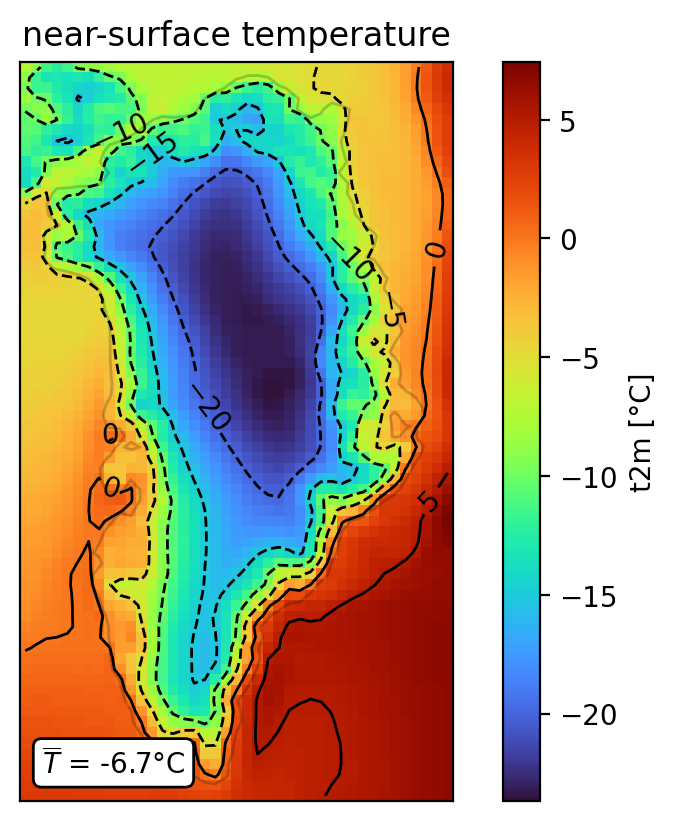

In [10]:
# The climate forcing is the sum of the present-day climatology and the climate anomaly of the year 2100
t2m_mean = np.mean(ERA5_t2m+NorESM_t2m, axis=2)

fig, ax = plt.subplots()

im = ax.imshow(t2m_mean, cmap='turbo', origin='lower')
fig.colorbar(im, label="t2m [°C]")
# overlay the coastal contour
ax.contour(grl40_surf, [0], colors='k', alpha=.2, linewidths=1)
cs = ax.contour(t2m_mean, colors='k', levels=6, linewidths=1)
ax.clabel(cs)

# add mean temperature as text label
props = dict(boxstyle='round', facecolor='white')
ax.text(0.05, 0.03, rf"$\overline{{T}}$ = {np.round(np.mean(t2m_mean), 1)}°C",
        verticalalignment="bottom", transform=ax.transAxes, bbox=props, zorder=10)

# remove all tick labels:
ax.set_xticks([])
ax.set_yticks([])

ax.set_title("near-surface temperature")
plt.savefig("figs/21c-t2m-mean.png", dpi=300, bbox_inches="tight")

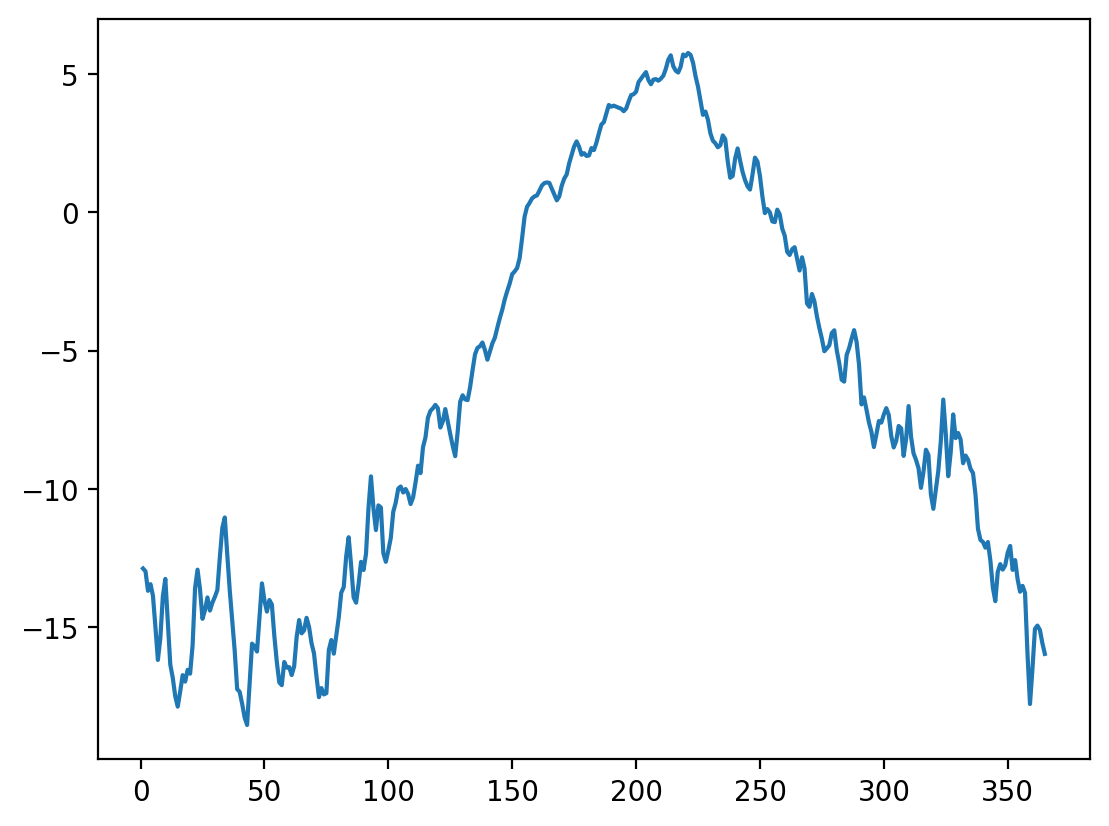

In [6]:
x = np.arange(1, 365+1)
y = np.mean(ERA5_t2m+NorESM_t2m, axis=(0,1))
plt.plot(x, y)

### Precipitation

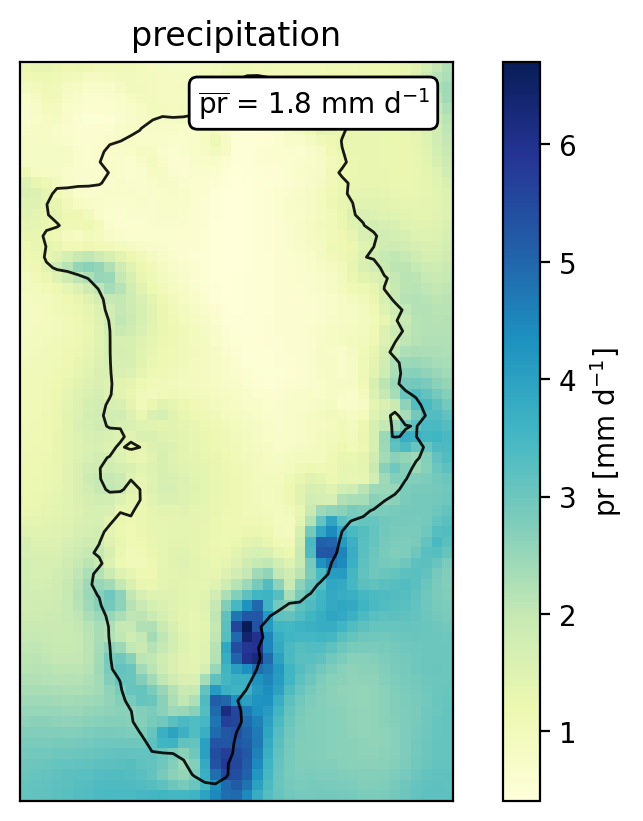

In [11]:
# plot precipitation analogously to temperature
prec_mean = np.mean(ERA5_prec+NorESM_prec, axis=2)

fig, ax = plt.subplots()

im = ax.imshow(prec_mean, cmap='YlGnBu', origin='lower')
fig.colorbar(im, label=r"pr [mm d$^{-1}$]")
# overlay the coastal contour
ax.contour(grl40_surf, [0], colors='k', alpha=.9, linewidths=1)

# add mean temperature as text label
props = dict(boxstyle='round', facecolor='white')
ax.text(0.41, 0.92, rf"$\overline{{\rm{{pr}}}}$ = {np.round(np.mean(prec_mean), 1)} mm d$^{{-1}}$",
        verticalalignment="bottom", transform=ax.transAxes, bbox=props)

# remove all tick labels:
ax.set_xticks([])
ax.set_yticks([])

ax.set_title("precipitation")
plt.savefig("figs/21c-pr-mean.png", dpi=300, bbox_inches="tight")